 ## Task 1: Develop python code to analyze cost of medicine/activities, cost distribution, and cost projections
    1.a Cost of Medicine per person in targeted population
    1.b Five Year Projection both cost and medicine needed over 5 Years
    1.c All funding sources, including salary information

In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data
population_Data = pd.read_csv("C:/Users/cbogadi/Downloads/population_data.csv")
transport_costData = pd.read_csv("C:/Users/cbogadi/Downloads/transport_costs.csv")
personnel_costsData = pd.read_csv("C:/Users/cbogadi/Downloads/personnel_costs.csv")

per_diemsData = pd.read_csv("C:/Users/cbogadi/Downloads/per_diems.csv")
miscellaneous_Data = pd.read_csv("C:/Users/cbogadi/Downloads/miscellaneous.csv")
drug_Data = pd.read_csv("C:/Users/cbogadi/Downloads/drug_data.csv")

disease_burdenData = pd.read_csv("C:/Users/cbogadi/Downloads/disease_burden.csv")
financing_activitiesData = pd.read_csv("C:/Users/cbogadi/Downloads/financing_activities.csv")
drug_data_with_cost_values = pd.read_excel("C:/Users/cbogadi/Downloads/drug_data_with_cost_values.xlsx")


## Updated total population data
total_Populationdata = pd.read_csv('C:/Users/cbogadi/Downloads/Updated_populationData.csv')


#### Data Cleaning & Feature Engineering

In [3]:
disease_burdenData['Total population2022'] = total_Populationdata[['FY 2022 - Total population']]
disease_burdenData['Total population2023'] = total_Populationdata[['FY 2023 - Total population']]
disease_burdenData['Total population2024'] = total_Populationdata[['FY 2024 - Total population']]
disease_burdenData['Total population2025'] = total_Populationdata[['FY 2025 - Total population']]

disease_burdenData['Total population2022'] = disease_burdenData['Total population2022'].str.replace(',','')
disease_burdenData['Total population2023'] = disease_burdenData['Total population2023'].str.replace(',','')
disease_burdenData['Total population2024'] = disease_burdenData['Total population2024'].str.replace(',','')
disease_burdenData['Total population2025'] = disease_burdenData['Total population2025'].str.replace(',','')

disease_burdenData['Total population2022'] = pd.to_numeric(disease_burdenData['Total population2022'])
disease_burdenData['Total population2023'] = pd.to_numeric(disease_burdenData['Total population2023'])
disease_burdenData['Total population2024'] = pd.to_numeric(disease_burdenData['Total population2024'])
disease_burdenData['Total population2025'] = pd.to_numeric(disease_burdenData['Total population2025'])


In [4]:
# Get full view of the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.options.display.float_format = '{:.2f}'.format

### Assumptions made:

- ##### Oncho Disease Burden Code Value: 0 = 0, 1 = 0.8
** ≥ 5 years
- ##### LF Disease Burden Code Value: 0 = 0, 1 = 0.96 
-- LF: ≥ 2 years and ≥ 5 years
- ##### Trachoma Disease Burden Code Value: 0 = 0 , 1 = 0.16, 2 = 0.16 
-- <6 months, 6-59 months and 5 years
- ##### STH Disease Burden Code Value: 0 = 0 , 1 = 0 , 2 = 0.96 , 3 = 0.96 
-- Pre-school age (1-4 years), School aged (5-14 years) and Adult (>15 years)

- ##### SCH Disease Burden Code Value: 0 = 0, 1 = 0.8 , 2 = 0.8, 3 = 0.80
-- School aged children and adults

### Cost of the MDA remains same across the years

##### Red flags 
* In the given dataset, target population for the year 2021 and 2022 are same. Ideally, that shouldn't be the case.
* For the drug data, it is uclear on the drug units year.


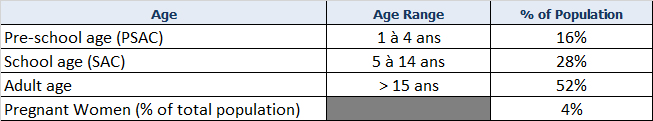

In [5]:
# Extract the disease burden code data for each year

disease_burdenData_2021 = disease_burdenData[['Regions','Districts','Total population2021','LF Disease Burden Code2021','Oncho Disease Burden Code2021','SCH Disease Burden Code2021','STH Disease Burden Code2021','Trachoma Disease Burden Code2021']]

disease_burdenData_2022 = disease_burdenData[['Regions','Districts','Total population2022','LF Disease Burden Code2022','Oncho Disease Burden Code2022','SCH Disease Burden Code2022','STH Disease Burden Code2022','Trachoma Disease Burden Code2022']]

disease_burdenData_2023 = disease_burdenData[['Regions','Districts','Total population2023','LF Disease Burden Code2023','Oncho Disease Burden Code2023','SCH Disease Burden Code2023','STH Disease Burden Code2023','Trachoma Disease Burden Code2023']]

disease_burdenData_2024 = disease_burdenData[['Regions','Districts','Total population2024','LF Disease Burden Code2024','Oncho Disease Burden Code2024','SCH Disease Burden Code2024','STH Disease Burden Code2024','Trachoma Disease Burden Code2024']]

disease_burdenData_2025 = disease_burdenData[['Regions','Districts','Total population2025','LF Disease Burden Code2025','Oncho Disease Burden Code2025','SCH Disease Burden Code2025','STH Disease Burden Code2025','Trachoma Disease Burden Code2025']]

disease_burdenData_2026 = disease_burdenData[['Regions','Districts','Total population2026','LF Disease Burden Code2026','Oncho Disease Burden Code2026','SCH Disease Burden Code2026','STH Disease Burden Code2026','Trachoma Disease Burden Code2026']]



* Extract target population for each disease code - 2021

In [6]:
disease_burdenData_2021['LF Target population 2021'] = (
                                                    np.select( condlist=[disease_burdenData_2021['LF Disease Burden Code2021'] == 0.0, disease_burdenData_2021['LF Disease Burden Code2021'] == 1], 
                                                    choicelist=[disease_burdenData_2021['Total population2021'] * 0, disease_burdenData_2021['Total population2021'] * 0.96], 
                                                    default=''))

disease_burdenData_2021['Oncho Target population 2021'] = (
                                                    np.select( condlist=[disease_burdenData_2021['Oncho Disease Burden Code2021'] == 0.0, disease_burdenData_2021['Oncho Disease Burden Code2021'] == 1], 
                                                    choicelist=[disease_burdenData_2021['Total population2021'] * 0, disease_burdenData_2021['Total population2021'] * 0.8], 
                                                    default=''))

disease_burdenData_2021['SCH Target population 2021'] = (np.select( condlist=[disease_burdenData_2021['SCH Disease Burden Code2021'] == 0.0, disease_burdenData_2021['SCH Disease Burden Code2021'] == 1.0 ,disease_burdenData_2021['SCH Disease Burden Code2021'] == 2.0,disease_burdenData_2021['SCH Disease Burden Code2021'] == 3.0], 
                                                    choicelist=[disease_burdenData_2021['Total population2021'] * 0, disease_burdenData_2021['Total population2021'] * 0.8, disease_burdenData_2021['Total population2021'] * 0.8, disease_burdenData_2021['Total population2021'] * 0.8], 
                                                    default=''))

disease_burdenData_2021['STH Target population 2021'] = (
                                                    np.select( condlist=[disease_burdenData_2021['STH Disease Burden Code2021'] == 0.0, disease_burdenData_2021['STH Disease Burden Code2021'] == 1,disease_burdenData_2021['STH Disease Burden Code2021'] == 2, disease_burdenData_2021['STH Disease Burden Code2021'] == 3], 
                                                    choicelist=[disease_burdenData_2021['Total population2021'] * 0, disease_burdenData_2021['Total population2021'] * 0, disease_burdenData_2021['Total population2021'] * 0.96,disease_burdenData_2021['Total population2021'] * 0.96], 
                                                    default=''))

disease_burdenData_2021['Trachoma Target population 2021'] = (
                                                    np.select( condlist=[disease_burdenData_2021['Trachoma Disease Burden Code2021'] == 0.0, disease_burdenData_2021['Trachoma Disease Burden Code2021'] == 1,disease_burdenData_2021['Trachoma Disease Burden Code2021'] == 2], 
                                                    choicelist=[disease_burdenData_2021['Total population2021'] * 0, disease_burdenData_2021['Total population2021'] * 0.16, disease_burdenData_2021['Total population2021'] * 0.16], 
                                                    default=''))


disease_burdenData_2021 = disease_burdenData_2021[['Regions','Districts','LF Target population 2021','Oncho Target population 2021','SCH Target population 2021','STH Target population 2021','Trachoma Target population 2021']]
disease_burdenData_2021_numeric = disease_burdenData_2021[['LF Target population 2021','Oncho Target population 2021','SCH Target population 2021','STH Target population 2021','Trachoma Target population 2021']].apply(pd.to_numeric)
disease_burdenData_2021_numeric = disease_burdenData_2021_numeric.round()
disease_burdenData_2021_categorical = disease_burdenData_2021[['Regions','Districts']]
disease_burdenData_2021 = disease_burdenData_2021_categorical.join(disease_burdenData_2021_numeric)
disease_burdenData_2021 = disease_burdenData_2021.dropna()
disease_burdenData_2021

,Regions,Districts,LF Target population 2021,Oncho Target population 2021,SCH Target population 2021,STH Target population 2021,Trachoma Target population 2021
0,Boke,Boffa,0.00,0.00,0.00,0.00,41774.00
1,Boke,Boke,0.00,0.00,442163.00,0.00,88433.00
2,Boke,Fria,0.00,0.00,95036.00,0.00,19007.00
3,Boke,Gaoual,228376.00,190314.00,190314.00,0.00,38063.00
4,Boke,Koundara,153218.00,127682.00,127682.00,0.00,25536.00
5,Conakry,Dixinn,0.00,0.00,0.00,0.00,0.00
6,Conakry,Kaloum,0.00,0.00,0.00,0.00,0.00
7,Conakry,Matam,0.00,0.00,0.00,0.00,0.00
8,Conakry,Matoto,0.00,0.00,654672.00,0.00,0.00
9,Conakry,Ratoma,0.00,0.00,641398.00,0.00,0.00


* #### Extract target population for each disease code - 2022

In [7]:
disease_burdenData_2022['LF Target population 2022'] = (
                                                    np.select( condlist=[disease_burdenData_2022['LF Disease Burden Code2022'] == 0.0, disease_burdenData_2022['LF Disease Burden Code2022'] == 1], 
                                                    choicelist=[disease_burdenData_2022['Total population2022'] * 0, disease_burdenData_2022['Total population2022'] * 0.96], 
                                                    default=''))

disease_burdenData_2022['Oncho Target population 2022'] = (
                                                    np.select( condlist=[disease_burdenData_2022['Oncho Disease Burden Code2022'] == 0.0, disease_burdenData_2022['Oncho Disease Burden Code2022'] == 1], 
                                                    choicelist=[disease_burdenData_2022['Total population2022'] * 0, disease_burdenData_2022['Total population2022'] * 0.8], 
                                                    default=''))

disease_burdenData_2022['SCH Target population 2022'] = (
                                                    np.select( condlist=[disease_burdenData_2022['SCH Disease Burden Code2022'] == 0.0, disease_burdenData_2022['SCH Disease Burden Code2022'] == 1,disease_burdenData_2022['SCH Disease Burden Code2022'] == 2, disease_burdenData_2022['SCH Disease Burden Code2022'] == 3], 
                                                    choicelist=[disease_burdenData_2022['Total population2022'] * 0, disease_burdenData_2022['Total population2022'] * 0.8, disease_burdenData_2022['Total population2022'] * 0.8,disease_burdenData_2022['Total population2022'] * 0.8], 
                                                    default=''))

disease_burdenData_2022['STH Target population 2022'] = (
                                                    np.select( condlist=[disease_burdenData_2022['STH Disease Burden Code2022'] == 0.0, disease_burdenData_2022['STH Disease Burden Code2022'] == 1,disease_burdenData_2022['STH Disease Burden Code2022'] == 2, disease_burdenData_2022['STH Disease Burden Code2022'] == 3], 
                                                    choicelist=[disease_burdenData_2022['Total population2022'] * 0, disease_burdenData_2022['Total population2022'] * 0, disease_burdenData_2022['Total population2022'] * 0.96,disease_burdenData_2022['Total population2022'] * 0.96], 
                                                    default=''))

disease_burdenData_2022['Trachoma Target population 2022'] = (
                                                    np.select( condlist=[disease_burdenData_2022['Trachoma Disease Burden Code2022'] == 0.0, disease_burdenData_2022['Trachoma Disease Burden Code2022'] == 1,disease_burdenData_2022['Trachoma Disease Burden Code2022'] == 2], 
                                                    choicelist=[disease_burdenData_2022['Total population2022'] * 0, disease_burdenData_2022['Total population2022'] * 0.16, disease_burdenData_2022['Total population2022'] * 0.16], 
                                                    default=''))



disease_burdenData_2022 = disease_burdenData_2022[['Regions','Districts','LF Target population 2022','Oncho Target population 2022','SCH Target population 2022','STH Target population 2022','Trachoma Target population 2022']]
disease_burdenData_2022_numeric = disease_burdenData_2022[['LF Target population 2022','Oncho Target population 2022','SCH Target population 2022','STH Target population 2022','Trachoma Target population 2022']].apply(pd.to_numeric)
disease_burdenData_2022_numeric = disease_burdenData_2022_numeric.round()
disease_burdenData_2022_categorical = disease_burdenData_2022[['Regions','Districts']]
disease_burdenData_2022 = disease_burdenData_2022_categorical.join(disease_burdenData_2022_numeric)
disease_burdenData_2022 = disease_burdenData_2022.dropna()
disease_burdenData_2022

,Regions,Districts,LF Target population 2022,Oncho Target population 2022,SCH Target population 2022,STH Target population 2022,Trachoma Target population 2022
0,Boke,Boffa,0.00,0.00,0.00,0.00,0.00
1,Boke,Boke,0.00,0.00,0.00,0.00,0.00
2,Boke,Fria,0.00,0.00,0.00,0.00,0.00
3,Boke,Gaoual,234542.00,195452.00,195452.00,0.00,39090.00
4,Boke,Koundara,157355.00,131129.00,131129.00,0.00,26226.00
5,Conakry,Dixinn,0.00,0.00,0.00,0.00,0.00
6,Conakry,Kaloum,0.00,0.00,0.00,0.00,0.00
7,Conakry,Matam,0.00,0.00,0.00,0.00,0.00
8,Conakry,Matoto,0.00,0.00,672348.00,0.00,0.00
9,Conakry,Ratoma,0.00,0.00,658716.00,0.00,0.00


* #### Extract target population for each disease code - 2023

In [8]:
disease_burdenData_2023['LF Target population 2023'] = (
                                                    np.select( condlist=[disease_burdenData_2023['LF Disease Burden Code2023'] == 0.0, disease_burdenData_2023['LF Disease Burden Code2023'] == 1], 
                                                    choicelist=[disease_burdenData_2023['Total population2023'] * 0, disease_burdenData_2023['Total population2023'] * 0.96], 
                                                    default=''))

disease_burdenData_2023['Oncho Target population 2023'] = (
                                                    np.select( condlist=[disease_burdenData_2023['Oncho Disease Burden Code2023'] == 0.0, disease_burdenData_2023['Oncho Disease Burden Code2023'] == 1], 
                                                    choicelist=[disease_burdenData_2023['Total population2023'] * 0, disease_burdenData_2023['Total population2023'] * 0.8], 
                                                    default=''))

disease_burdenData_2023['SCH Target population 2023'] = (
                                                    np.select( condlist=[disease_burdenData_2023['SCH Disease Burden Code2023'] == 0.0, disease_burdenData_2023['SCH Disease Burden Code2023'] == 1,disease_burdenData_2023['SCH Disease Burden Code2023'] == 2, disease_burdenData_2023['SCH Disease Burden Code2023'] == 3], 
                                                    choicelist=[disease_burdenData_2023['Total population2023'] * 0, disease_burdenData_2023['Total population2023'] * 0.8, disease_burdenData_2023['Total population2023'] * 0.8,disease_burdenData_2023['Total population2023'] * 0.8], 
                                                    default=''))

disease_burdenData_2023['STH Target population 2023'] = (
                                                    np.select( condlist=[disease_burdenData_2023['STH Disease Burden Code2023'] == 0.0, disease_burdenData_2023['STH Disease Burden Code2023'] == 1,disease_burdenData_2023['STH Disease Burden Code2023'] == 2, disease_burdenData_2023['STH Disease Burden Code2023'] == 3], 
                                                    choicelist=[disease_burdenData_2023['Total population2023'] * 0, disease_burdenData_2023['Total population2023'] * 0, disease_burdenData_2023['Total population2023'] * 0.96,disease_burdenData_2023['Total population2023'] * 0.96], 
                                                    default=''))

disease_burdenData_2023['Trachoma Target population 2023'] = (
                                                    np.select( condlist=[disease_burdenData_2023['Trachoma Disease Burden Code2023'] == 0.0, disease_burdenData_2023['Trachoma Disease Burden Code2023'] == 1,disease_burdenData_2023['Trachoma Disease Burden Code2023'] == 2], 
                                                    choicelist=[disease_burdenData_2023['Total population2023'] * 0, disease_burdenData_2023['Total population2023'] * 0.16, disease_burdenData_2023['Total population2023'] * 0.16], 
                                                    default=''))

disease_burdenData_2023 = disease_burdenData_2023[['Regions','Districts','LF Target population 2023','Oncho Target population 2023','SCH Target population 2023','STH Target population 2023','Trachoma Target population 2023']]
disease_burdenData_2023_numeric = disease_burdenData_2023[['LF Target population 2023','Oncho Target population 2023','SCH Target population 2023','STH Target population 2023','Trachoma Target population 2023']].apply(pd.to_numeric)
disease_burdenData_2023_numeric = disease_burdenData_2023_numeric.round()
disease_burdenData_2023_categorical = disease_burdenData_2023[['Regions','Districts']]
disease_burdenData_2023 = disease_burdenData_2023_categorical.join(disease_burdenData_2023_numeric)
disease_burdenData_2023 = disease_burdenData_2023.dropna()
disease_burdenData_2023

,Regions,Districts,LF Target population 2023,Oncho Target population 2023,SCH Target population 2023,STH Target population 2023,Trachoma Target population 2023
0,Boke,Boffa,0.00,0.00,0.00,0.00,0.00
1,Boke,Boke,0.00,0.00,0.00,0.00,0.00
2,Boke,Fria,0.00,0.00,0.00,0.00,0.00
3,Boke,Gaoual,240876.00,200730.00,200730.00,0.00,40146.00
4,Boke,Koundara,161604.00,134670.00,134670.00,0.00,26934.00
5,Conakry,Dixinn,0.00,0.00,0.00,0.00,0.00
6,Conakry,Kaloum,0.00,0.00,0.00,0.00,0.00
7,Conakry,Matam,0.00,0.00,0.00,0.00,0.00
8,Conakry,Matoto,0.00,0.00,690502.00,0.00,0.00
9,Conakry,Ratoma,0.00,0.00,676502.00,0.00,0.00


* #### Extract target population for each disease code - 2024

In [9]:
disease_burdenData_2024['LF Target population 2024'] = (
                                                    np.select( condlist=[disease_burdenData_2024['LF Disease Burden Code2024'] == 0.0, disease_burdenData_2024['LF Disease Burden Code2024'] == 1], 
                                                    choicelist=[disease_burdenData_2024['Total population2024'] * 0, disease_burdenData_2024['Total population2024'] * 0.96], 
                                                    default=''))

disease_burdenData_2024['Oncho Target population 2024'] = (
                                                    np.select( condlist=[disease_burdenData_2024['Oncho Disease Burden Code2024'] == 0.0, disease_burdenData_2024['Oncho Disease Burden Code2024'] == 1], 
                                                    choicelist=[disease_burdenData_2024['Total population2024'] * 0, disease_burdenData_2024['Total population2024'] * 0.8], 
                                                    default=''))

disease_burdenData_2024['SCH Target population 2024'] = (
                                                    np.select( condlist=[disease_burdenData_2024['SCH Disease Burden Code2024'] == 0.0, disease_burdenData_2024['SCH Disease Burden Code2024'] == 1,disease_burdenData_2024['SCH Disease Burden Code2024'] == 2, disease_burdenData_2024['SCH Disease Burden Code2024'] == 3], 
                                                    choicelist=[disease_burdenData_2024['Total population2024'] * 0, disease_burdenData_2024['Total population2024'] * 0.8, disease_burdenData_2024['Total population2024'] * 0.8,disease_burdenData_2024['Total population2024'] * 0.8], 
                                                    default=''))

disease_burdenData_2024['STH Target population 2024'] = (
                                                    np.select( condlist=[disease_burdenData_2024['STH Disease Burden Code2024'] == 0.0, disease_burdenData_2024['STH Disease Burden Code2024'] == 1,disease_burdenData_2024['STH Disease Burden Code2024'] == 2, disease_burdenData_2024['STH Disease Burden Code2024'] == 3], 
                                                    choicelist=[disease_burdenData_2024['Total population2024'] * 0, disease_burdenData_2024['Total population2024'] * 0, disease_burdenData_2024['Total population2024'] * 0.96,disease_burdenData_2024['Total population2024'] * 0.96], 
                                                    default=''))

disease_burdenData_2024['Trachoma Target population 2024'] = (
                                                    np.select( condlist=[disease_burdenData_2024['Trachoma Disease Burden Code2024'] == 0.0, disease_burdenData_2024['Trachoma Disease Burden Code2024'] == 1,disease_burdenData_2024['Trachoma Disease Burden Code2024'] == 2], 
                                                    choicelist=[disease_burdenData_2024['Total population2024'] * 0, disease_burdenData_2024['Total population2024'] * 0.16, disease_burdenData_2024['Total population2024'] * 0.16], 
                                                    default=''))


disease_burdenData_2024 = disease_burdenData_2024[['Regions','Districts','LF Target population 2024','Oncho Target population 2024','SCH Target population 2024','STH Target population 2024','Trachoma Target population 2024']]
disease_burdenData_2024_numeric = disease_burdenData_2024[['LF Target population 2024','Oncho Target population 2024','SCH Target population 2024','STH Target population 2024','Trachoma Target population 2024']].apply(pd.to_numeric)
disease_burdenData_2024_numeric = disease_burdenData_2024_numeric.round()
disease_burdenData_2024_categorical = disease_burdenData_2024[['Regions','Districts']]
disease_burdenData_2024 = disease_burdenData_2024_categorical.join(disease_burdenData_2024_numeric)
disease_burdenData_2024 = disease_burdenData_2024.dropna()
disease_burdenData_2024


,Regions,Districts,LF Target population 2024,Oncho Target population 2024,SCH Target population 2024,STH Target population 2024,Trachoma Target population 2024
0,Boke,Boffa,0.00,0.00,0.00,0.00,0.00
1,Boke,Boke,0.00,0.00,0.00,0.00,0.00
2,Boke,Fria,0.00,0.00,0.00,0.00,0.00
3,Boke,Gaoual,247379.00,206149.00,206149.00,0.00,41230.00
4,Boke,Koundara,165967.00,138306.00,138306.00,0.00,27661.00
5,Conakry,Dixinn,0.00,0.00,0.00,0.00,0.00
6,Conakry,Kaloum,0.00,0.00,0.00,0.00,0.00
7,Conakry,Matam,0.00,0.00,0.00,0.00,0.00
8,Conakry,Matoto,0.00,0.00,709145.00,0.00,0.00
9,Conakry,Ratoma,0.00,0.00,694767.00,0.00,0.00


* ### Extract target population for each disease code - 2025


In [10]:
disease_burdenData_2025['LF Target population 2025'] = (
                                                    np.select( condlist=[disease_burdenData_2025['LF Disease Burden Code2025'] == 0.0, disease_burdenData_2025['LF Disease Burden Code2025'] == 1], 
                                                    choicelist=[disease_burdenData_2025['Total population2025'] * 0, disease_burdenData_2025['Total population2025'] * 0.96], 
                                                    default=''))

disease_burdenData_2025['Oncho Target population 2025'] = (
                                                    np.select( condlist=[disease_burdenData_2025['Oncho Disease Burden Code2025'] == 0.0, disease_burdenData_2025['Oncho Disease Burden Code2025'] == 1], 
                                                    choicelist=[disease_burdenData_2025['Total population2025'] * 0, disease_burdenData_2025['Total population2025'] * 0.8], 
                                                    default=''))

disease_burdenData_2025['SCH Target population 2025'] = (
                                                    np.select( condlist=[disease_burdenData_2025['SCH Disease Burden Code2025'] == 0.0, disease_burdenData_2025['SCH Disease Burden Code2025'] == 1,disease_burdenData_2025['SCH Disease Burden Code2025'] == 2, disease_burdenData_2025['SCH Disease Burden Code2025'] == 3], 
                                                    choicelist=[disease_burdenData_2025['Total population2025'] * 0, disease_burdenData_2025['Total population2025'] * 0.8, disease_burdenData_2025['Total population2025'] * 0.8,disease_burdenData_2025['Total population2025'] * 0.8], 
                                                    default=''))

disease_burdenData_2025['STH Target population 2025'] = (
                                                    np.select( condlist=[disease_burdenData_2025['STH Disease Burden Code2025'] == 0.0, disease_burdenData_2025['STH Disease Burden Code2025'] == 1,disease_burdenData_2025['STH Disease Burden Code2025'] == 2, disease_burdenData_2025['STH Disease Burden Code2025'] == 3], 
                                                    choicelist=[disease_burdenData_2025['Total population2025'] * 0, disease_burdenData_2025['Total population2025'] * 0, disease_burdenData_2025['Total population2025'] * 0.96,disease_burdenData_2025['Total population2025'] * 0.96], 
                                                    default=''))

disease_burdenData_2025['Trachoma Target population 2025'] = (
                                                    np.select( condlist=[disease_burdenData_2025['Trachoma Disease Burden Code2025'] == 0.0, disease_burdenData_2025['Trachoma Disease Burden Code2025'] == 1,disease_burdenData_2025['Trachoma Disease Burden Code2025'] == 2], 
                                                    choicelist=[disease_burdenData_2025['Total population2025'] * 0, disease_burdenData_2025['Total population2025'] * 0.16, disease_burdenData_2025['Total population2025'] * 0.16], 
                                                    default=''))

disease_burdenData_2025 = disease_burdenData_2025[['Regions','Districts','LF Target population 2025','Oncho Target population 2025','SCH Target population 2025','STH Target population 2025','Trachoma Target population 2025']]
disease_burdenData_2025_numeric = disease_burdenData_2025[['LF Target population 2025','Oncho Target population 2025','SCH Target population 2025','STH Target population 2025','Trachoma Target population 2025']].apply(pd.to_numeric)
disease_burdenData_2025_numeric = disease_burdenData_2025_numeric.round()
disease_burdenData_2025_categorical = disease_burdenData_2025[['Regions','Districts']]
disease_burdenData_2025 = disease_burdenData_2025_categorical.join(disease_burdenData_2025_numeric)
disease_burdenData_2025 = disease_burdenData_2025.dropna()
disease_burdenData_2025

,Regions,Districts,LF Target population 2025,Oncho Target population 2025,SCH Target population 2025,STH Target population 2025,Trachoma Target population 2025
0,Boke,Boffa,0.00,0.00,0.00,0.00,0.00
1,Boke,Boke,0.00,0.00,0.00,0.00,0.00
2,Boke,Fria,0.00,0.00,0.00,0.00,0.00
3,Boke,Gaoual,0.00,211715.00,211715.00,0.00,42343.00
4,Boke,Koundara,170448.00,0.00,142040.00,0.00,0.00
5,Conakry,Dixinn,0.00,0.00,0.00,0.00,0.00
6,Conakry,Kaloum,0.00,0.00,0.00,0.00,0.00
7,Conakry,Matam,0.00,0.00,0.00,0.00,0.00
8,Conakry,Matoto,0.00,0.00,728292.00,0.00,0.00
9,Conakry,Ratoma,0.00,0.00,713526.00,0.00,0.00


* #### Extract target population for each disease code - 2026

In [11]:
disease_burdenData_2026['LF Target population 2026'] = (
                                                    np.select( condlist=[disease_burdenData_2026['LF Disease Burden Code2026'] == 0.0, disease_burdenData_2026['LF Disease Burden Code2026'] == 1], 
                                                    choicelist=[disease_burdenData_2026['Total population2026'] * 0, disease_burdenData_2026['Total population2026'] * 0.96], 
                                                    default=''))

disease_burdenData_2026['Oncho Target population 2026'] = (
                                                    np.select( condlist=[disease_burdenData_2026['Oncho Disease Burden Code2026'] == 0.0, disease_burdenData_2026['Oncho Disease Burden Code2026'] == 1], 
                                                    choicelist=[disease_burdenData_2026['Total population2026'] * 0, disease_burdenData_2026['Total population2026'] * 0.8], 
                                                    default=''))

disease_burdenData_2026['SCH Target population 2026'] = (
                                                    np.select( condlist=[disease_burdenData_2026['SCH Disease Burden Code2026'] == 0.0, disease_burdenData_2026['SCH Disease Burden Code2026'] == 1,disease_burdenData_2026['SCH Disease Burden Code2026'] == 2, disease_burdenData_2026['SCH Disease Burden Code2026'] == 3], 
                                                    choicelist=[disease_burdenData_2026['Total population2026'] * 0, disease_burdenData_2026['Total population2026'] * 0.8, disease_burdenData_2026['Total population2026'] * 0.8,disease_burdenData_2026['Total population2026'] * 0.8], 
                                                    default=''))

disease_burdenData_2026['STH Target population 2026'] = (
                                                    np.select( condlist=[disease_burdenData_2026['STH Disease Burden Code2026'] == 0.0, disease_burdenData_2026['STH Disease Burden Code2026'] == 1,disease_burdenData_2026['STH Disease Burden Code2026'] == 2, disease_burdenData_2026['STH Disease Burden Code2026'] == 3], 
                                                    choicelist=[disease_burdenData_2026['Total population2026'] * 0, disease_burdenData_2026['Total population2026'] * 0, disease_burdenData_2026['Total population2026'] * 0.96,disease_burdenData_2026['Total population2026'] * 0.96], 
                                                    default=''))

disease_burdenData_2026['Trachoma Target population 2026'] = (
                                                    np.select( condlist=[disease_burdenData_2026['Trachoma Disease Burden Code2026'] == 0.0, disease_burdenData_2026['Trachoma Disease Burden Code2026'] == 1,disease_burdenData_2026['Trachoma Disease Burden Code2026'] == 2], 
                                                    choicelist=[disease_burdenData_2026['Total population2026'] * 0, disease_burdenData_2026['Total population2026'] * 0.16, disease_burdenData_2026['Total population2026'] * 0.16], 
                                                    default=''))

disease_burdenData_2026 = disease_burdenData_2026[['Regions','Districts','LF Target population 2026','Oncho Target population 2026','SCH Target population 2026','STH Target population 2026','Trachoma Target population 2026']]
disease_burdenData_2026_numeric = disease_burdenData_2026[['LF Target population 2026','Oncho Target population 2026','SCH Target population 2026','STH Target population 2026','Trachoma Target population 2026']].apply(pd.to_numeric)
disease_burdenData_2026_numeric = disease_burdenData_2026_numeric.round()
disease_burdenData_2026_categorical = disease_burdenData_2026[['Regions','Districts']]
disease_burdenData_2026 = disease_burdenData_2026_categorical.join(disease_burdenData_2026_numeric)
disease_burdenData_2026 = disease_burdenData_2026.dropna()
disease_burdenData_2026


,Regions,Districts,LF Target population 2026,Oncho Target population 2026,SCH Target population 2026,STH Target population 2026,Trachoma Target population 2026
0,Boke,Boffa,0.00,0.00,0.00,0.00,0.00
1,Boke,Boke,0.00,0.00,0.00,0.00,0.00
2,Boke,Fria,0.00,0.00,0.00,0.00,0.00
3,Boke,Gaoual,0.00,0.00,0.00,0.00,0.00
4,Boke,Koundara,0.00,0.00,142594.00,0.00,0.00
5,Conakry,Dixinn,0.00,0.00,0.00,0.00,0.00
6,Conakry,Kaloum,0.00,0.00,0.00,0.00,0.00
7,Conakry,Matam,0.00,0.00,0.00,0.00,0.00
8,Conakry,Matoto,0.00,0.00,731133.00,0.00,0.00
9,Conakry,Ratoma,0.00,0.00,716309.00,0.00,0.00


### Number of drug units required for each year (2021 to 2026)
#### Assumptions made:
* On the given dataset, the assuption was made that the number of drug units is for the year 2021

* Estimating number of drug units for each year is by using the proportions from the past years

    
### <Center> Number of drug units required (IVM) (2022) = $\left\{ \frac { ( Number of IVM drug units for the year 2021)* ( Estimated Target population of the disease (Oncho) (2022) + Estimated Target population of the disease (LF) (2022))) ) }{Total target population of the disease (Oncho) (2021) + Total target population of the disease (LF) (2021)} \right\}$

In [12]:
## Number of drugs required for each year

IVM_Ivermectin_2021 = drug_Data.iloc[1][2]
IVM_Ivermectin_2022 = ( IVM_Ivermectin_2021 * ( disease_burdenData_2022['Oncho Target population 2022'].sum() + disease_burdenData_2022['LF Target population 2022'].sum() )) / ( disease_burdenData_2021['LF Target population 2021'].sum() + disease_burdenData_2021['Oncho Target population 2021'].sum())
IVM_Ivermectin_2023 = ( IVM_Ivermectin_2022 * ( disease_burdenData_2023['Oncho Target population 2023'].sum() + disease_burdenData_2023['LF Target population 2023'].sum() )) / ( disease_burdenData_2022['LF Target population 2022'].sum() + disease_burdenData_2022['Oncho Target population 2022'].sum())
IVM_Ivermectin_2024 = ( IVM_Ivermectin_2023 * ( disease_burdenData_2024['Oncho Target population 2024'].sum() + disease_burdenData_2024['LF Target population 2024'].sum() )) / ( disease_burdenData_2023['LF Target population 2023'].sum() + disease_burdenData_2023['Oncho Target population 2023'].sum())
IVM_Ivermectin_2025 = ( IVM_Ivermectin_2024 * ( disease_burdenData_2025['Oncho Target population 2025'].sum() + disease_burdenData_2025['LF Target population 2025'].sum() )) / ( disease_burdenData_2024['LF Target population 2024'].sum() + disease_burdenData_2024['Oncho Target population 2024'].sum())
IVM_Ivermectin_2026 = ( IVM_Ivermectin_2025 * ( disease_burdenData_2026['Oncho Target population 2026'].sum() + disease_burdenData_2026['LF Target population 2026'].sum() )) / ( disease_burdenData_2025['LF Target population 2025'].sum() + disease_burdenData_2025['Oncho Target population 2025'].sum())

ALB_Albendazole_with_IVM_or_DEC_2021 = drug_Data.iloc[2][2]
ALB_Albendazole_with_IVM_or_DEC_2022 = ( ALB_Albendazole_with_IVM_or_DEC_2021 * disease_burdenData_2022['LF Target population 2022'].sum() ) / disease_burdenData_2021['LF Target population 2021'].sum()
ALB_Albendazole_with_IVM_or_DEC_2023 = ( ALB_Albendazole_with_IVM_or_DEC_2022 * disease_burdenData_2023['LF Target population 2023'].sum() ) / disease_burdenData_2022['LF Target population 2022'].sum()
ALB_Albendazole_with_IVM_or_DEC_2024 = ( ALB_Albendazole_with_IVM_or_DEC_2023 * disease_burdenData_2024['LF Target population 2024'].sum() ) / disease_burdenData_2023['LF Target population 2023'].sum()
ALB_Albendazole_with_IVM_or_DEC_2025 = ( ALB_Albendazole_with_IVM_or_DEC_2024 * disease_burdenData_2025['LF Target population 2025'].sum() ) / disease_burdenData_2024['LF Target population 2024'].sum()
ALB_Albendazole_with_IVM_or_DEC_2026 = ( ALB_Albendazole_with_IVM_or_DEC_2025 * disease_burdenData_2026['LF Target population 2026'].sum() ) / disease_burdenData_2025['LF Target population 2025'].sum()

# Number of drug units for each year

ALB_or_MBD_alone_or_with_PZQ_2021 = drug_Data.iloc[3][2]
ALB_or_MBD_alone_or_with_PZQ_2022 = ( ALB_or_MBD_alone_or_with_PZQ_2021 * disease_burdenData_2022['STH Target population 2022'].sum() ) / disease_burdenData_2021['STH Target population 2021'].sum()
ALB_or_MBD_alone_or_with_PZQ_2023 = ( ALB_or_MBD_alone_or_with_PZQ_2022 * disease_burdenData_2023['STH Target population 2023'].sum() ) / disease_burdenData_2022['STH Target population 2022'].sum()
ALB_or_MBD_alone_or_with_PZQ_2024 = ( ALB_or_MBD_alone_or_with_PZQ_2023 * disease_burdenData_2024['STH Target population 2024'].sum() ) / disease_burdenData_2023['STH Target population 2023'].sum()
ALB_or_MBD_alone_or_with_PZQ_2025 = ( ALB_or_MBD_alone_or_with_PZQ_2024 * disease_burdenData_2025['STH Target population 2025'].sum() ) / disease_burdenData_2024['STH Target population 2024'].sum()
ALB_or_MBD_alone_or_with_PZQ_2026 = ( ALB_or_MBD_alone_or_with_PZQ_2025 * disease_burdenData_2026['STH Target population 2026'].sum() ) / disease_burdenData_2025['STH Target population 2025'].sum()

# Number of drug units for each year

PZQ_Praziquantel_2021 = drug_Data.iloc[4][2]
PZQ_Praziquantel_2022 = ( PZQ_Praziquantel_2021 * disease_burdenData_2022['SCH Target population 2022'].sum() ) / disease_burdenData_2021['SCH Target population 2021'].sum()
PZQ_Praziquantel_2023 = ( PZQ_Praziquantel_2022 * disease_burdenData_2023['SCH Target population 2023'].sum() ) / disease_burdenData_2022['SCH Target population 2022'].sum()
PZQ_Praziquantel_2024 = ( PZQ_Praziquantel_2023 * disease_burdenData_2024['SCH Target population 2024'].sum() ) / disease_burdenData_2023['SCH Target population 2023'].sum()
PZQ_Praziquantel_2025 = ( PZQ_Praziquantel_2024 * disease_burdenData_2025['SCH Target population 2025'].sum() ) / disease_burdenData_2024['SCH Target population 2024'].sum()
PZQ_Praziquantel_2026 = ( PZQ_Praziquantel_2025 * disease_burdenData_2026['SCH Target population 2026'].sum() ) / disease_burdenData_2025['SCH Target population 2025'].sum()

# Number of drug units for each year
TEO_2021 = drug_Data.iloc[5][2]
TEO_2022 = ( TEO_2021 * disease_burdenData_2022['Trachoma Target population 2022'].sum() ) / disease_burdenData_2021['Trachoma Target population 2021'].sum()
TEO_2023 = ( TEO_2022 * disease_burdenData_2023['Trachoma Target population 2023'].sum() ) / disease_burdenData_2022['Trachoma Target population 2022'].sum()
TEO_2024 = ( TEO_2023 * disease_burdenData_2024['Trachoma Target population 2024'].sum() ) / disease_burdenData_2023['Trachoma Target population 2023'].sum()
TEO_2025 = ( TEO_2024 * disease_burdenData_2025['Trachoma Target population 2025'].sum() ) / disease_burdenData_2024['Trachoma Target population 2024'].sum()
TEO_2026 = ( TEO_2024 * disease_burdenData_2026['Trachoma Target population 2026'].sum() ) / disease_burdenData_2025['Trachoma Target population 2025'].sum()


#### Number of districts affected by the disease from 2021 to 2025

In [43]:
disease_burden_data_2021_2025 = disease_burdenData_2021.merge(disease_burdenData_2022).merge(disease_burdenData_2023).merge(disease_burdenData_2024).merge(disease_burdenData_2025).merge(disease_burdenData_2026)

disease_burden_data_2021_2025

,Regions,Districts,LF Target population 2021,Oncho Target population 2021,SCH Target population 2021,STH Target population 2021,Trachoma Target population 2021,LF Target population 2022,Oncho Target population 2022,SCH Target population 2022,STH Target population 2022,Trachoma Target population 2022,LF Target population 2023,Oncho Target population 2023,SCH Target population 2023,STH Target population 2023,Trachoma Target population 2023,LF Target population 2024,Oncho Target population 2024,SCH Target population 2024,STH Target population 2024,Trachoma Target population 2024,LF Target population 2025,Oncho Target population 2025,SCH Target population 2025,STH Target population 2025,Trachoma Target population 2025,LF Target population 2026,Oncho Target population 2026,SCH Target population 2026,STH Target population 2026,Trachoma Target population 2026
0,Boke,Boffa,0.00,0.00,0.00,0.00,41774.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Boke,Boke,0.00,0.00,442163.00,0.00,88433.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Boke,Fria,0.00,0.00,95036.00,0.00,19007.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Boke,Gaoual,228376.00,190314.00,190314.00,0.00,38063.00,234542.00,195452.00,195452.00,0.00,39090.00,240876.00,200730.00,200730.00,0.00,40146.00,247379.00,206149.00,206149.00,0.00,41230.00,0.00,211715.00,211715.00,0.00,42343.00,0.00,0.00,0.00,0.00,0.00
4,Boke,Koundara,153218.00,127682.00,127682.00,0.00,25536.00,157355.00,131129.00,131129.00,0.00,26226.00,161604.00,134670.00,134670.00,0.00,26934.00,165967.00,138306.00,138306.00,0.00,27661.00,170448.00,0.00,142040.00,0.00,0.00,0.00,0.00,142594.00,0.00,0.00
5,Conakry,Dixinn,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,Conakry,Kaloum,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Conakry,Matam,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Conakry,Matoto,0.00,0.00,654672.00,0.00,0.00,0.00,0.00,672348.00,0.00,0.00,0.00,0.00,690502.00,0.00,0.00,0.00,0.00,709145.00,0.00,0.00,0.00,0.00,728292.00,0.00,0.00,0.00,0.00,731133.00,0.00,0.00
9,Conakry,Ratoma,0.00,0.00,641398.00,0.00,0.00,0.00,0.00,658716.00,0.00,0.00,0.00,0.00,676502.00,0.00,0.00,0.00,0.00,694767.00,0.00,0.00,0.00,0.00,713526.00,0.00,0.00,0.00,0.00,716309.00,0.00,0.00


In [46]:
# Count the number of target districts 
     
value = []

for column_name in disease_burden_data_2021_2026.loc[:, ~disease_burden_data_2021_2026.columns.isin(['Regions','Districts'])].columns:
    column = disease_burden_data_2021_2026.loc[:, ~disease_burden_data_2021_2026.columns.isin(['Regions','Districts'])][column_name]
    # Get the count of Zeros in column 
    count = (column != 0).sum()
    if count == 0:
        count = 0
        value.append(count)
    else:
        count = count+1
        value.append(count)
    #print('Total number of districts with ', column_name, ' is : ', count)


Target_Disease_population_year = { 
        
        'Name of the disease & Target population year': ['LF Target population 2021',
       'Oncho Target population 2021', 'SCH Target population 2021',
       'STH Target population 2021', 'Trachoma Target population 2021',
       'LF Target population 2022', 'Oncho Target population 2022',
       'SCH Target population 2022', 'STH Target population 2022',
       'Trachoma Target population 2022', 'LF Target population 2023',
       'Oncho Target population 2023', 'SCH Target population 2023',
       'STH Target population 2023', 'Trachoma Target population 2023',
       'LF Target population 2024', 'Oncho Target population 2024',
       'SCH Target population 2024', 'STH Target population 2024',
       'Trachoma Target population 2024', 'LF Target population 2025',
       'Oncho Target population 2025', 'SCH Target population 2025',
       'STH Target population 2025', 'Trachoma Target population 2025',
       'LF Target population 2026', 'Oncho Target population 2026',
       'SCH Target population 2026', 'STH Target population 2026',
       'Trachoma Target population 2026'],
        
        'Total no.of districts effected by the disease at the endemic level':value
      }

Target_Yearlydiseasepopulation = pd.DataFrame(Target_Disease_population_year)
Target_Yearlydiseasepopulation

,Name of the disease & Target population year,Total no.of districts effected by the disease at the endemic level
0,LF Target population 2021,22
1,Oncho Target population 2021,25
2,SCH Target population 2021,32
3,STH Target population 2021,18
4,Trachoma Target population 2021,32
5,LF Target population 2022,22
6,Oncho Target population 2022,16
7,SCH Target population 2022,30
8,STH Target population 2022,15
9,Trachoma Target population 2022,29


### Cost Anlaysis per person

### <Center> Cost per person tageted (LF) = $\left\{ \frac { Total Cost for the disease(LF)}{No.of persons targeted by the disease(LF)} \right\}$


##### Total cost for the disease includes = (Operational, Salaries, Implementation etc.,)

### <Center> Required drugs per disease

| Name of the Disease 	| Required Drugs                                 	|
|---------------------	|------------------------------------------------	|
| LF                  	| PC: Albendazole, Ivermectin 	|
| Oncho               	| PC: Ivermectin    	|
| SCH                 	| PC: Praziquantel                     	|
| STH                 	| PC: Albendazole Mebendazole                    	|
| Trachoma            	| PC: Azithromycin Tetracycline                  	|

### <Center> Cost of each drug 

| Name of the drug                      	| Cost of each drug (GNF) 	|
|---------------------------------------	|-------------------------	|
| IVM - Ivermectin                      	| 105000                  	|
| ALB - Albendazole (with IVM or DEC)   	| 200                     	|
| ALB - Albendazole (alone or with PZQ) 	| 450                     	|
| MBD - Mebendazole (alone or with PZQ) 	| 495                     	|
| PZQ - Praziquantel                    	| 15000                   	|
| TEO - Tetracycline eye ointment       	| 10000                   	|
| DEC - Diethylcarbamizine              	| 0                       	|
| Zmax - POS - Zithromax POS            	| 485000                  	|
| Zmax -TABS - Zithromax tablets        	| 114500                  	|

In [48]:


cost_Factors = {'Factors': ['Strategic Planning','Program PMO','Advocacy','Social Mobilasation','Mass Drug Administration',
                            'Medical Supply Chain Logistics','Monitoring and Evaluation','Training','Mapping Disease Areas',
                            'Mornidity Management','Vector Control and Immuzation Campaigns','Water and Sanitation Campaign'],
                'Value(GNF)': [178656000,898000000,87846960,1316056200,653477000,750981280,1121936760,288298500,41752200,
                               4560749512,12404670,904750000]}

cost_Factors = pd.DataFrame(cost_Factors)
cost_Factors

,Factors,Value(GNF)
0,Strategic Planning,178656000
1,Program PMO,898000000
2,Advocacy,87846960
3,Social Mobilasation,1316056200
4,Mass Drug Administration,653477000
5,Medical Supply Chain Logistics,750981280
6,Monitoring and Evaluation,1121936760
7,Training,288298500
8,Mapping Disease Areas,41752200
9,Mornidity Management,4560749512


### Five-Year Projections - 2021 to 2025

* ##### Year 2021 projection 

In [29]:
## Projection for the year 2021

Year_2021 = {'Name of the disease':['LF', 'Oncho', 'SCH', 'STH', 'Trachoma'], 
        'Total no.of population effected by disease':[disease_burdenData_2021['LF Target population 2021'].sum(),
                                                      disease_burdenData_2021['Oncho Target population 2021'].sum(),
                                                      disease_burdenData_2021['SCH Target population 2021'].sum(),
                                                      disease_burdenData_2021['STH Target population 2021'].sum(),
                                                      disease_burdenData_2021['Trachoma Target population 2021'].sum()],
                                                      
        'Number of districts targeted by the disease': [Target_Yearlydiseasepopulation.iloc[0][1],Target_Yearlydiseasepopulation.iloc[1][1],
                                         Target_Yearlydiseasepopulation.iloc[2][1],Target_Yearlydiseasepopulation.iloc[3][1],
                                         Target_Yearlydiseasepopulation.iloc[4][1]],
        
        'Number of drug units required':[ALB_Albendazole_with_IVM_or_DEC_2021,IVM_Ivermectin_2021,PZQ_Praziquantel_2021,ALB_or_MBD_alone_or_with_PZQ_2021,TEO_2021],
        
        'Cost of Treatment per person (GNF)': [(cost_Factors['Value(GNF)'].sum()/disease_burdenData_2021['LF Target population 2021'].sum()),
                                               (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2021['Oncho Target population 2021'].sum()), 
                                               (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2021['SCH Target population 2021'].sum()),
                                               (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2021['STH Target population 2021'].sum()),
                                               (cost_Factors['Value(GNF)'].sum() /disease_burdenData_2021['Trachoma Target population 2021'].sum()) ]}

Year_2021 = pd.DataFrame(Year_2021)
Year_2021['Number of drug units required'] = Year_2021['Number of drug units required'].round()
Year_2021 = Year_2021.transpose()
Year_2021 = Year_2021.rename(columns=Year_2021.iloc[0]).drop(Year_2021.index[0])
Year_2021['Year'] = 2021
Year_2021

,LF,Oncho,SCH,STH,Trachoma,Year
Total no.of population effected by disease,6983853.00,6368205.00,9254563.00,5721921.00,1622154.00,2021
Number of districts targeted by the disease,22,25,32,18,32,2021
Number of drug units required,5997953.00,19746442.00,20796953.00,843901.00,0.00,2021
Cost of Treatment per person (GNF),1548.56,1698.27,1168.60,1890.08,6667.01,2021


* ##### Year 2021 projection 


In [28]:
## Projection for the year 2022

Year_2022 = {'Name of the disease':['LF', 'Oncho', 'SCH', 'STH', 'Trachoma'], 
              'Total no.of population effected by disease':[disease_burdenData_2022['LF Target population 2022'].sum(),
                                                            disease_burdenData_2022['Oncho Target population 2022'].sum(),
                                                            disease_burdenData_2022['SCH Target population 2022'].sum(),
                                                            disease_burdenData_2022['STH Target population 2022'].sum(),
                                                            disease_burdenData_2022['Trachoma Target population 2022'].sum()],
                                                      
              'Number of districts targeted by the disease': [Target_Yearlydiseasepopulation.iloc[5][1],Target_Yearlydiseasepopulation.iloc[6][1],
                                               Target_Yearlydiseasepopulation.iloc[7][1],Target_Yearlydiseasepopulation.iloc[8][1],
                                               Target_Yearlydiseasepopulation.iloc[9][1]],
        
              'Number of drug units required':[ALB_Albendazole_with_IVM_or_DEC_2022,IVM_Ivermectin_2022,PZQ_Praziquantel_2022,ALB_or_MBD_alone_or_with_PZQ_2022,TEO_2022],
        
               'Cost of Treatment per person (GNF)': [(cost_Factors['Value(GNF)'].sum()/disease_burdenData_2022['LF Target population 2022'].sum()),
                                                      (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2022['Oncho Target population 2022'].sum()), 
                                                      (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2022['SCH Target population 2022'].sum()),
                                                      (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2022['STH Target population 2022'].sum()),
                                                      (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2022['Trachoma Target population 2022'].sum()) ]}


Year_2022 = pd.DataFrame(Year_2022)
Year_2022['Number of drug units required'] = Year_2022['Number of drug units required'].round()
Year_2022 = Year_2022.transpose()
Year_2022 = Year_2022.rename(columns=Year_2022.iloc[0]).drop(Year_2022.index[0])
Year_2022['Year'] = 2022
Year_2022

,LF,Oncho,SCH,STH,Trachoma,Year
Total no.of population effected by disease,7047414.00,3485231.00,8952731.00,4728427.00,1512710.00,2022
Number of districts targeted by the disease,22,16,30,15,29,2022
Number of drug units required,6052541.00,15576795.00,20118673.00,697375.00,0.00,2022
Cost of Treatment per person (GNF),1534.59,3103.07,1208.00,2287.21,7149.36,2022


* ##### Year 2022 projection 


In [27]:
## Projection for the year 2023

Year_2023 = {'Name of the disease':['LF', 'Oncho', 'SCH', 'STH', 'Trachoma'], 
              'Total no.of population effected by disease':[disease_burdenData_2023['LF Target population 2023'].sum(),
                                                            disease_burdenData_2023['Oncho Target population 2023'].sum(),
                                                            disease_burdenData_2023['SCH Target population 2023'].sum(),
                                                            disease_burdenData_2023['STH Target population 2023'].sum(),
                                                            disease_burdenData_2023['Trachoma Target population 2023'].sum()],
                                                      
              'Number of districts targeted by the disease': [Target_Yearlydiseasepopulation.iloc[10][1],Target_Yearlydiseasepopulation.iloc[11][1],
                                               Target_Yearlydiseasepopulation.iloc[12][1],Target_Yearlydiseasepopulation.iloc[13][1],
                                               Target_Yearlydiseasepopulation.iloc[14][1]],
        
              'Number of drug units required':[ALB_Albendazole_with_IVM_or_DEC_2023,IVM_Ivermectin_2023,PZQ_Praziquantel_2023,ALB_or_MBD_alone_or_with_PZQ_2023,TEO_2023],
        
               'Cost of Treatment per person (GNF)': [(cost_Factors['Value(GNF)'].sum()/disease_burdenData_2023['LF Target population 2023'].sum()),
                                                      (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2023['Oncho Target population 2023'].sum()), 
                                                      (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2023['SCH Target population 2023'].sum()),
                                                      (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2023['STH Target population 2023'].sum()),
                                                      (cost_Factors['Value(GNF)'].sum() /disease_burdenData_2023['Trachoma Target population 2023'].sum()) ]}


Year_2023 = pd.DataFrame(Year_2023)
Year_2023['Number of drug units required'] = Year_2023['Number of drug units required'].round()
Year_2023 = Year_2023.transpose()
Year_2023 = Year_2023.rename(columns=Year_2023.iloc[0]).drop(Year_2023.index[0])
Year_2023['Year'] = 2023
Year_2023

,LF,Oncho,SCH,STH,Trachoma,Year
Total no.of population effected by disease,5683779.00,3579333.00,9194457.00,4856095.00,1553556.00,2023
Number of districts targeted by the disease,18,16,30,15,29,2023
Number of drug units required,4881408.00,13699274.00,20661882.00,716204.00,0.00,2023
Cost of Treatment per person (GNF),1902.77,3021.49,1176.24,2227.08,6961.39,2023


* ##### Year 2023 projection 


In [26]:
## Projection for the year 2023

Year_2023 = {'Name of the disease':['LF', 'Oncho', 'SCH', 'STH', 'Trachoma'], 
              'Total no.of population effected by disease':[disease_burdenData_2023['LF Target population 2023'].sum(),
                                                            disease_burdenData_2023['Oncho Target population 2023'].sum(),
                                                            disease_burdenData_2023['SCH Target population 2023'].sum(),
                                                            disease_burdenData_2023['STH Target population 2023'].sum(),
                                                            disease_burdenData_2023['Trachoma Target population 2023'].sum()],
                                                      
              'Number of districts targeted by the disease': [Target_Yearlydiseasepopulation.iloc[10][1],Target_Yearlydiseasepopulation.iloc[11][1],
                                               Target_Yearlydiseasepopulation.iloc[12][1],Target_Yearlydiseasepopulation.iloc[13][1],
                                               Target_Yearlydiseasepopulation.iloc[14][1]],
        
              'Number of drug units required':[ALB_Albendazole_with_IVM_or_DEC_2023,IVM_Ivermectin_2023,PZQ_Praziquantel_2023,ALB_or_MBD_alone_or_with_PZQ_2023,TEO_2023],
        
               'Cost of Treatment per person (GNF)': [(cost_Factors['Value(GNF)'].sum()/disease_burdenData_2023['LF Target population 2023'].sum()),
                                                      (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2023['Oncho Target population 2023'].sum()), 
                                                      (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2023['SCH Target population 2023'].sum()),
                                                      (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2023['STH Target population 2023'].sum()),
                                                      (cost_Factors['Value(GNF)'].sum() /disease_burdenData_2023['Trachoma Target population 2023'].sum()) ]}


Year_2023 = pd.DataFrame(Year_2023)
Year_2023['Number of drug units required'] = Year_2023['Number of drug units required'].round()
Year_2023 = Year_2023.transpose()
Year_2023 = Year_2023.rename(columns=Year_2023.iloc[0]).drop(Year_2023.index[0])
Year_2023['Year'] = 2023
Year_2023

,LF,Oncho,SCH,STH,Trachoma,Year
Total no.of population effected by disease,5683779.00,3579333.00,9194457.00,4856095.00,1553556.00,2023
Number of districts targeted by the disease,18,16,30,15,29,2023
Number of drug units required,4881408.00,13699274.00,20661882.00,716204.00,0.00,2023
Cost of Treatment per person (GNF),1902.77,3021.49,1176.24,2227.08,6961.39,2023


* ##### Year 2024 projection 


In [30]:
## Projection for the year 2024

Year_2024 = {'Name of the disease':['LF', 'Oncho', 'SCH', 'STH', 'Trachoma'], 
              'Total no.of population effected by disease':[disease_burdenData_2024['LF Target population 2024'].sum(),
                                                            disease_burdenData_2024['Oncho Target population 2024'].sum(),
                                                            disease_burdenData_2024['SCH Target population 2024'].sum(),
                                                            disease_burdenData_2024['STH Target population 2024'].sum(),
                                                            disease_burdenData_2024['Trachoma Target population 2024'].sum()],
                                                      
              'Number of districts targeted by the disease': [Target_Yearlydiseasepopulation.iloc[15][1],Target_Yearlydiseasepopulation.iloc[16][1],
                                               Target_Yearlydiseasepopulation.iloc[17][1],Target_Yearlydiseasepopulation.iloc[18][1],
                                               Target_Yearlydiseasepopulation.iloc[19][1]],
        
              'Number of drug units required':[ALB_Albendazole_with_IVM_or_DEC_2024,IVM_Ivermectin_2024,PZQ_Praziquantel_2024,ALB_or_MBD_alone_or_with_PZQ_2024,TEO_2024],
        
               'Cost of Treatment per person (GNF)': [(cost_Factors['Value(GNF)'].sum() / disease_burdenData_2024['LF Target population 2024'].sum()),
                                                      (cost_Factors['Value(GNF)'].sum() / disease_burdenData_2024['Oncho Target population 2024'].sum()), 
                                                      (cost_Factors['Value(GNF)'].sum() / disease_burdenData_2024['SCH Target population 2024'].sum()),
                                                      (cost_Factors['Value(GNF)'].sum() / disease_burdenData_2024['STH Target population 2024'].sum()),
                                                      (cost_Factors['Value(GNF)'].sum() /disease_burdenData_2024['Trachoma Target population 2024'].sum()) ]}


Year_2024 = pd.DataFrame(Year_2024)
Year_2024['Number of drug units required'] = Year_2024['Number of drug units required'].round()
Year_2024 = Year_2024.transpose()
Year_2024 = Year_2024.rename(columns=Year_2024.iloc[0]).drop(Year_2024.index[0])
Year_2024['Year'] = 2024
Year_2024

,LF,Oncho,SCH,STH,Trachoma,Year
Total no.of population effected by disease,6293851.00,3003876.00,8553669.00,4051335.00,1193469.00,2024
Number of districts targeted by the disease,18,13,27,13,22,2024
Number of drug units required,5405357.00,13750467.00,19221896.00,597513.00,0.00,2024
Cost of Treatment per person (GNF),1718.33,3600.32,1264.36,2669.47,9061.74,2024


* ##### Year 2025 projection 


In [31]:
## Projection for the year 2025

Year_2025 = {'Name of the disease':['LF', 'Oncho', 'SCH', 'STH', 'Trachoma'], 
              'Total no.of population effected by disease':[disease_burdenData_2025['LF Target population 2025'].sum(),
                                                            disease_burdenData_2025['Oncho Target population 2025'].sum(),
                                                            disease_burdenData_2025['SCH Target population 2025'].sum(),
                                                            disease_burdenData_2025['STH Target population 2025'].sum(),
                                                            disease_burdenData_2025['Trachoma Target population 2025'].sum()],
                                                      
              'Number of districts targeted by the disease': [Target_Yearlydiseasepopulation.iloc[20][1],Target_Yearlydiseasepopulation.iloc[21][1],
                                               Target_Yearlydiseasepopulation.iloc[22][1],Target_Yearlydiseasepopulation.iloc[23][1],
                                               Target_Yearlydiseasepopulation.iloc[24][1]],
        
              'Number of drug units required':[ALB_Albendazole_with_IVM_or_DEC_2025,IVM_Ivermectin_2025,PZQ_Praziquantel_2025,ALB_or_MBD_alone_or_with_PZQ_2025,TEO_2025],
        
               'Cost of Treatment per person (GNF)': [(cost_Factors['Value(GNF)'].sum()/disease_burdenData_2025['LF Target population 2025'].sum()),
                                                      (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2025['Oncho Target population 2025'].sum()), 
                                                      (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2025['SCH Target population 2025'].sum()),
                                                      (cost_Factors['Value(GNF)'].sum()/disease_burdenData_2025['STH Target population 2025'].sum()),
                                                      (cost_Factors['Value(GNF)'].sum() /disease_burdenData_2025['Trachoma Target population 2025'].sum()) ]}


Year_2025 = pd.DataFrame(Year_2025)
Year_2025['Number of drug units required'] = Year_2025['Number of drug units required'].round()
Year_2025 = Year_2025.transpose()
Year_2025 = Year_2025.rename(columns=Year_2025.iloc[0]).drop(Year_2025.index[0])
Year_2025['Year'] = 2025
Year_2025

,LF,Oncho,SCH,STH,Trachoma,Year
Total no.of population effected by disease,4228283.00,2807018.00,8268890.00,1867113.00,842236.00,2025
Number of districts targeted by the disease,12,11,26,7,15,2025
Number of drug units required,3631383.00,10404551.00,18581938.00,275372.00,0.00,2025
Cost of Treatment per person (GNF),2557.75,3852.81,1307.90,5792.32,12840.71,2025


In [38]:
### Concatenation of years from 2021 to 2025

five_Yearprojection = pd.concat([Year_2021,Year_2022,Year_2023,Year_2024,Year_2025],axis=0)
five_Yearprojection = five_Yearprojection.sort_index(ascending=True)
five_Yearprojection

,LF,Oncho,SCH,STH,Trachoma,Year
Cost of Treatment per person (GNF),2557.75,3852.81,1307.90,5792.32,12840.71,2025
Cost of Treatment per person (GNF),1718.33,3600.32,1264.36,2669.47,9061.74,2024
Cost of Treatment per person (GNF),1548.56,1698.27,1168.60,1890.08,6667.01,2021
Cost of Treatment per person (GNF),1902.77,3021.49,1176.24,2227.08,6961.39,2023
Cost of Treatment per person (GNF),1534.59,3103.07,1208.00,2287.21,7149.36,2022
Number of districts targeted by the disease,12,11,26,7,15,2025
Number of districts targeted by the disease,18,13,27,13,22,2024
Number of districts targeted by the disease,18,16,30,15,29,2023
Number of districts targeted by the disease,22,16,30,15,29,2022
Number of districts targeted by the disease,22,25,32,18,32,2021


### Task 2: Total Population Vs Target population - Summary by districts


In [41]:
# Extract total population
total_Popualtion2021 = disease_burdenData[['Regions','Districts','Total population2021']].dropna()
total_Popualtion2022 = disease_burdenData[['Regions','Districts','Total population2022']].dropna()
total_Popualtion2023 = disease_burdenData[['Regions','Districts','Total population2023']].dropna()
total_Popualtion2024 = disease_burdenData[['Regions','Districts','Total population2024']].dropna()
total_Popualtion2025 = disease_burdenData[['Regions','Districts','Total population2025']].dropna()
#total_Popualtion2026 = disease_burdenData[['Regions','Districts','Total population2026']].dropna()

## Extract target population
total_Popualtion2021['Target_population2021'] = disease_burdenData_2021[['LF Target population 2021','Oncho Target population 2021','SCH Target population 2021','STH Target population 2021','Trachoma Target population 2021']].sum(axis = 1)
total_Popualtion2022['Target_population2022'] = disease_burdenData_2022[['LF Target population 2022','Oncho Target population 2022','SCH Target population 2022','STH Target population 2022','Trachoma Target population 2022']].sum(axis = 1)
total_Popualtion2023['Target_population2023'] = disease_burdenData_2023[['LF Target population 2023','Oncho Target population 2023','SCH Target population 2023','STH Target population 2023','Trachoma Target population 2023']].sum(axis = 1)
total_Popualtion2024['Target_population2024'] = disease_burdenData_2024[['LF Target population 2024','Oncho Target population 2024','SCH Target population 2024','STH Target population 2024','Trachoma Target population 2024']].sum(axis = 1)
total_Popualtion2025['Target_population2025'] = disease_burdenData_2025[['LF Target population 2025','Oncho Target population 2025','SCH Target population 2025','STH Target population 2025','Trachoma Target population 2025']].sum(axis = 1)
#total_Popualtion2026['Target_population2026'] = disease_burdenData_2026[['LF Target population 2026','Oncho Target population 2026','SCH Target population 2026','STH Target population 2026','Trachoma Target population 2026']].sum(axis = 1)


In [42]:
total_targetpopulation = total_Popualtion2021.merge(total_Popualtion2022).merge(total_Popualtion2023).merge(total_Popualtion2024).merge(total_Popualtion2025)#.merge(total_Popualtion2026)
total_targetpopulation

,Regions,Districts,Total population2021,Target_population2021,Total population2022,Target_population2022,Total population2023,Target_population2023,Total population2024,Target_population2024,Total population2025,Target_population2025
0,Boke,Boffa,261085.00,41774.00,268134.00,0.00,275374.00,0.00,282809.00,0.00,290445.00,0.00
1,Boke,Boke,552704.00,530596.00,567627.00,0.00,582953.00,0.00,598693.00,0.00,614857.00,0.00
2,Boke,Fria,118795.00,114043.00,122002.00,0.00,125297.00,0.00,128680.00,0.00,132154.00,0.00
3,Boke,Gaoual,237892.00,647067.00,244315.00,664536.00,250912.00,682482.00,257686.00,700907.00,264644.00,465773.00
4,Boke,Koundara,159602.00,434118.00,163911.00,445839.00,168337.00,457878.00,172882.00,470240.00,177550.00,312488.00
5,Conakry,Dixinn,166835.00,0.00,171340.00,0.00,175966.00,0.00,180717.00,0.00,185596.00,0.00
6,Conakry,Kaloum,76754.00,0.00,78826.00,0.00,80955.00,0.00,83140.00,0.00,85385.00,0.00
7,Conakry,Matam,176047.00,0.00,180800.00,0.00,185682.00,0.00,190695.00,0.00,195844.00,0.00
8,Conakry,Matoto,818340.00,654672.00,840435.00,672348.00,863127.00,690502.00,886431.00,709145.00,910365.00,728292.00
9,Conakry,Ratoma,801748.00,641398.00,823395.00,658716.00,845627.00,676502.00,868459.00,694767.00,891907.00,713526.00
